# A Robust Peak Numbering Algorithm

## Problem description

Signal output of a Multi-Pixel Photon Counter (MPPC) is best seen by this scope screenshot provided by Hamamatsu.

![title](https://hub.hamamatsu.com/sp/hc/resources/TN0014/figure_1-14a.jpg)

The most conspicuous feature in the screenshot is that the amplitudes of signals are integral multiples of a unit amplitude. In this example, the green trace has an amplitude 2 times as large as that of the orange trace. If one integrates the area under the signals, the area values will concentrate at integral multiples of a certain area, forming peaks with a equal distance. Below is an example.

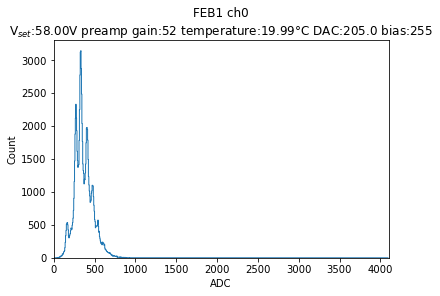

In [11]:
# my own modules
import os, sys
sys.path.insert(0, '../FEBDAQMULTx2/data_analysis/utilities')
import common_tools

bv58_thr205 = common_tools.MPPCLine('sample_data/robust_peak_numbering/20210301_124140_dark_rate_feb0_ch0_thr205.0.root',
                                    1,0,prom=100,pcb_half=0)
bv58_thr205.adc_spectrum()

### Trigger threshold
The data acquisition system is triggered whenever the signal is larger than a predefined level called threshold, or equivalently here, DAC. This DAC effectively is a minimum area. All events with an area smaller than this minimum area are simply ignore by the system. The effect on the ADC spectra is that there will be peaks on the low ADC side removed by the DAC. Below is an example of data taken with a high DAC value.

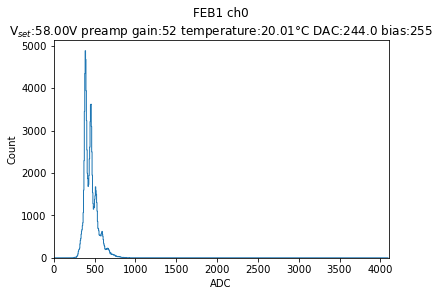

In [12]:
bv58_thr244 = common_tools.MPPCLine('sample_data/robust_peak_numbering/20210225_172920_mppc_volt58.0_thr244_gain52_temp20.0.root',
                                    1,0,prom=100,pcb_half=0)
bv58_thr244.adc_spectrum()

Obviously, several peaks on the left are removed by a higher DAC.
### Peak numbering convention
If the DAC is low enough, the first peak seen is the area under the baseline, or the pedestal peak. A number 0 is assigned to the pedestal peak. The equidistance peaks to the right are sequentially numbered 1, 2,... etc.
### The question
Given a dataset taken with an arbitrary threshold, determine the number of peaks removed by that threshold.
## Numbering peaks with auxiliary data
The gain, or the distance between peaks, has a linear relationship with the bias voltage applied to the MPPCs.